绘制分类问题的分隔线

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2], [1.2, 1.9], [6, 2], [5.7, 1.5], [5.4, 2.2]]) 
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

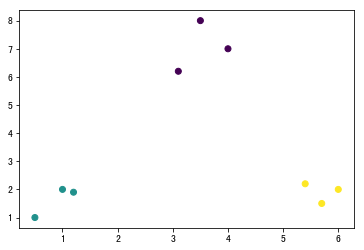

In [10]:
plt.scatter(X[:,0],X[:,1],c=y)

In [13]:
lr = LogisticRegression(C=1, multi_class='multinomial', solver='lbfgs')
lr.fit(X, y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
# 生成网格线数据，从而得到决策边界
X_grid = np.arange(np.min(X[:,0])-1, np.max(X[:,0])+1, 0.1)
Y_grid = np.arange(np.min(X[:,1])-1, np.max(X[:,1])+1, 0.1)
X_values, Y_values = np.meshgrid(X_grid, Y_grid)
X_values

array([[-0.5, -0.4, -0.3, ...,  6.7,  6.8,  6.9],
       [-0.5, -0.4, -0.3, ...,  6.7,  6.8,  6.9],
       [-0.5, -0.4, -0.3, ...,  6.7,  6.8,  6.9],
       ...,
       [-0.5, -0.4, -0.3, ...,  6.7,  6.8,  6.9],
       [-0.5, -0.4, -0.3, ...,  6.7,  6.8,  6.9],
       [-0.5, -0.4, -0.3, ...,  6.7,  6.8,  6.9]])

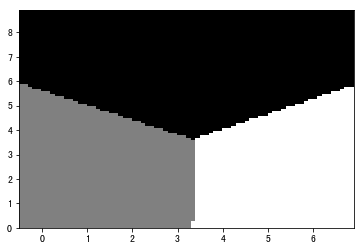

In [32]:
# 对网格线数据进行预测
mesh_out = lr.predict(np.c_[X_values.ravel(), Y_values.ravel()])
mesh_out = mesh_out.reshape(X_values.shape)
plt.pcolormesh(X_values, Y_values, mesh_out, cmap=plt.cm.gray)

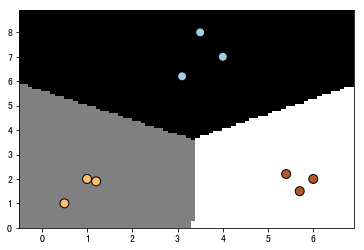

In [36]:
plt.pcolormesh(X_values, Y_values, mesh_out, cmap=plt.cm.gray)
plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)
plt.xlim(X_values.min(), X_values.max())
plt.ylim(Y_values.min(), Y_values.max())
plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))
plt.show()